# Rotate

In [1]:
PATH = 'E:/Datasets/SOCOFing/SOCOFing_300/'
PATH2 = 'E:/Datasets/SOCOFing/SOCOFing_301to600/'
PATH3 = 'E:/Datasets/SOCOFing/SOCOFing_601to900/'
PATH4 = 'E:/Datasets/SOCOFing/SOCOFing_901to1200/'
list_path = [PATH, PATH2, PATH3, PATH4]
SAVING_PATH = 'E:/Datasets/SOCOFing/Processed/latent_image_rotated/'

PATH5 = 'E:/Datasets/SOCOFing/SOCOFing_1201to1500/'
PATH6 = 'E:/Datasets/SOCOFing/SOCOFing_1501to1800/'
PATH7 = 'E:/Datasets/SOCOFing/SOCOFing_1801to2100/'
PATH8 = 'E:/Datasets/SOCOFing/SOCOFing_2101to2400/'
list_path_flip = [PATH5, PATH6, PATH7, PATH8]
SAVING_PATH_FLIPPED = 'E:/Datasets/SOCOFing/Processed/latent_image_flipped/'

PATH9 = 'E:/Datasets/SOCOFing/SOCOFing_2401to2700/'
PATH10 = 'E:/Datasets/SOCOFing/SOCOFing_2701to3000/'
PATH11 = 'E:/Datasets/SOCOFing/SOCOFing_3001to3300/'
PATH12 = 'E:/Datasets/SOCOFing/SOCOFing_3301to3600/'
list_path_rf = [PATH9, PATH10, PATH11, PATH12]
SAVING_PATH_RF = 'E:/Datasets/SOCOFing/Processed/latent_image_rotated_flipped/'

In [2]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


In [3]:
image_file_list = []
for i in range (4):
    temp = [f for f in glob.glob(list_path[i] + "*.BMP")]
    image_file_list.append(temp)

In [4]:
flat_list = [item for sublist in image_file_list for item in sublist]

In [5]:
print(len(flat_list))

1200


In [6]:
print(flat_list)

['E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Left_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Right_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Right_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Right_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\10__M_Right_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\11__M_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\11__M_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\11__M_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\11__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_300\\11__M_Left_thumb_finger.BMP', '

In [7]:
image_list = []
for img_file in flat_list:
    temp = cv2.imread(img_file, 0)
    image_list.append(temp)

1200


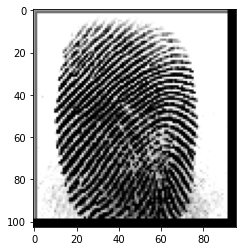

In [8]:
print(len(image_list))
plt.imshow(image_list[1000], cmap = 'gray')

In [9]:
def crop_image(image):
    height = image.shape[0]
    width = image.shape[1]
    padding_top = 9
    padding_left = 2
    padding_right = 4 
    padding_bottom = 4 
    return image[padding_top:height - padding_bottom, padding_left:width - padding_right]

In [10]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h), borderValue=(255,255,255))
    
    return rotated

In [11]:
def add_border_image(image, add):
    height = image.shape[0]
    width = image.shape[1]
    padding_top = 9
    padding_left = 2
    padding_right = 4 
    padding_bottom = 4
    result = image.copy()
    result[padding_top:height - padding_bottom, padding_left:width - padding_right] = add
    return result

In [12]:
rotated_image_list = []

for image in image_list:
    cropped_img = crop_image(image)
    rotated_img = rotate(cropped_img, random.randint(-15, 15))
    rotated_border_img = add_border_image(image, rotated_img)
    
    rotated_image_list.append(rotated_border_img)


In [13]:
print(len(rotated_image_list))

1200


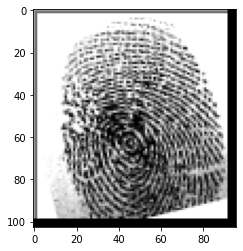

In [14]:
plt.imshow(rotated_image_list[1055], cmap = 'gray')

In [15]:
#get file name

filename_list = []
for path in flat_list:
    base = os.path.basename(path)
    filename = os.path.splitext(base)[0]
    filename_list.append(filename)
    

In [16]:
print(len(filename_list))
print(filename_list)

1200
['10__M_Left_index_finger', '10__M_Left_little_finger', '10__M_Left_middle_finger', '10__M_Left_ring_finger', '10__M_Left_thumb_finger', '10__M_Right_index_finger', '10__M_Right_little_finger', '10__M_Right_middle_finger', '10__M_Right_ring_finger', '10__M_Right_thumb_finger', '11__M_Left_index_finger', '11__M_Left_little_finger', '11__M_Left_middle_finger', '11__M_Left_ring_finger', '11__M_Left_thumb_finger', '11__M_Right_index_finger', '11__M_Right_little_finger', '11__M_Right_middle_finger', '11__M_Right_ring_finger', '11__M_Right_thumb_finger', '12__M_Left_index_finger', '12__M_Left_little_finger', '12__M_Left_middle_finger', '12__M_Left_ring_finger', '12__M_Left_thumb_finger', '12__M_Right_index_finger', '12__M_Right_little_finger', '12__M_Right_middle_finger', '12__M_Right_ring_finger', '12__M_Right_thumb_finger', '13__F_Left_index_finger', '13__F_Left_little_finger', '13__F_Left_middle_finger', '13__F_Left_ring_finger', '13__F_Left_thumb_finger', '13__F_Right_index_finger',

In [17]:
#save image to folder

for i, image in enumerate(rotated_image_list):
    cv2.imwrite(SAVING_PATH + filename_list[i] + "_rotated" + '.BMP', image)

# Flip

In [18]:
image_file_list_for_flip = []
for i in range (4):
    temp = [f for f in glob.glob(list_path_flip[i] + "*.BMP")]
    image_file_list_for_flip.append(temp)

In [19]:
flat_list_for_flip = [item for sublist in image_file_list_for_flip for item in sublist]

In [20]:
print(len(flat_list_for_flip))
print(flat_list_for_flip)

1200
['E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Left_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Right_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Right_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Right_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\121__F_Right_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\122__M_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\122__M_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_1201to1500\\122__M_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/S

In [21]:
image_list_for_flip = []
for img_file in flat_list_for_flip:
    temp = cv2.imread(img_file, 0)
    image_list_for_flip.append(temp)

1200


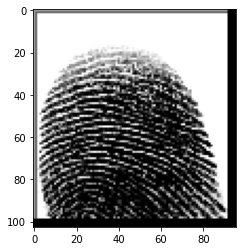

In [22]:
print(len(image_list_for_flip))
plt.imshow(image_list_for_flip[1000], cmap = 'gray')

In [23]:
flipped_image_list = []

for image in image_list_for_flip:
    cropped_img = crop_image(image)
    flipped_img = cv2.flip(cropped_img, 1)
    flipped_border_img = add_border_image(image, flipped_img)
    
    flipped_image_list.append(flipped_border_img)
    

1200


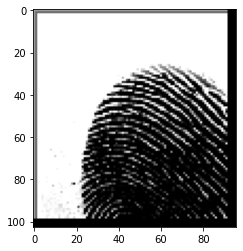

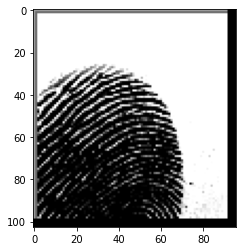

(<matplotlib.image.AxesImage at 0x1aaff503220>, None)

In [24]:
print(len(flipped_image_list))
plt.imshow(image_list_for_flip[105], cmap = 'gray'), plt.show()
plt.imshow(flipped_image_list[105], cmap = 'gray'), plt.show()

In [25]:
#get file name

filename_flip_list = []
for path in flat_list_for_flip:
    base = os.path.basename(path)
    filename = os.path.splitext(base)[0]
    filename_flip_list.append(filename)

In [26]:
print(len(filename_flip_list))
print(filename_flip_list)

1200
['121__F_Left_index_finger', '121__F_Left_little_finger', '121__F_Left_middle_finger', '121__F_Left_ring_finger', '121__F_Left_thumb_finger', '121__F_Right_index_finger', '121__F_Right_little_finger', '121__F_Right_middle_finger', '121__F_Right_ring_finger', '121__F_Right_thumb_finger', '122__M_Left_index_finger', '122__M_Left_little_finger', '122__M_Left_middle_finger', '122__M_Left_ring_finger', '122__M_Left_thumb_finger', '122__M_Right_index_finger', '122__M_Right_little_finger', '122__M_Right_middle_finger', '122__M_Right_ring_finger', '122__M_Right_thumb_finger', '123__M_Left_index_finger', '123__M_Left_little_finger', '123__M_Left_middle_finger', '123__M_Left_ring_finger', '123__M_Left_thumb_finger', '123__M_Right_index_finger', '123__M_Right_little_finger', '123__M_Right_middle_finger', '123__M_Right_ring_finger', '123__M_Right_thumb_finger', '124__M_Left_index_finger', '124__M_Left_little_finger', '124__M_Left_middle_finger', '124__M_Left_ring_finger', '124__M_Left_thumb_f

In [27]:
#save image to folder

for i, image in enumerate(flipped_image_list):
    cv2.imwrite(SAVING_PATH_FLIPPED + filename_flip_list[i] + "_flipped" + '.BMP', image)

# Rotate + Flip

In [28]:
image_file_list_for_rf = []
for i in range (4):
    temp = [f for f in glob.glob(list_path_rf[i] + "*.BMP")]
    image_file_list_for_rf.append(temp)

In [29]:
flat_list_for_rf = [item for sublist in image_file_list_for_rf for item in sublist]

In [30]:
print(len(flat_list_for_rf))
print(flat_list_for_rf)

1200
['E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Left_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Left_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Right_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Right_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Right_middle_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Right_ring_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\241__M_Right_thumb_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\242__M_Left_index_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\242__M_Left_little_finger.BMP', 'E:/Datasets/SOCOFing/SOCOFing_2401to2700\\242__M_Left_middle_finger.BMP', 'E:/Datasets/SOCOFing/S

In [31]:
image_list_for_rf = []
for img_file in flat_list_for_rf:
    temp = cv2.imread(img_file, 0)
    image_list_for_rf.append(temp)

1200


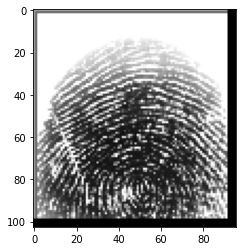

In [32]:
print(len(image_list_for_rf))
plt.imshow(image_list_for_rf[1000], cmap = 'gray')

In [33]:
rf_image_list = []

for image in image_list_for_rf:
    cropped_img = crop_image(image)
    rotated_img = rotate(cropped_img, random.randint(-15, 15))
    flipped_img = cv2.flip(rotated_img, 1)    
    rf_border_img = add_border_image(image, flipped_img)
    
    rf_image_list.append(rf_border_img)

1200


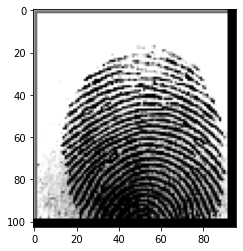

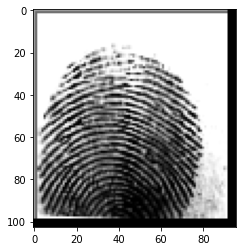

(<matplotlib.image.AxesImage at 0x1aaff66cac0>, None)

In [34]:
print(len(rf_image_list))
plt.imshow(image_list_for_rf[1051], cmap = 'gray'), plt.show()
plt.imshow(rf_image_list[1051], cmap = 'gray'), plt.show()

In [35]:
#get file name

filename_rf_list = []
for path in flat_list_for_rf:
    base = os.path.basename(path)
    filename = os.path.splitext(base)[0]
    filename_rf_list.append(filename)

In [36]:
print(len(filename_rf_list))
print(filename_rf_list)

1200
['241__M_Left_index_finger', '241__M_Left_little_finger', '241__M_Left_middle_finger', '241__M_Left_ring_finger', '241__M_Left_thumb_finger', '241__M_Right_index_finger', '241__M_Right_little_finger', '241__M_Right_middle_finger', '241__M_Right_ring_finger', '241__M_Right_thumb_finger', '242__M_Left_index_finger', '242__M_Left_little_finger', '242__M_Left_middle_finger', '242__M_Left_ring_finger', '242__M_Left_thumb_finger', '242__M_Right_index_finger', '242__M_Right_little_finger', '242__M_Right_middle_finger', '242__M_Right_ring_finger', '242__M_Right_thumb_finger', '243__M_Left_index_finger', '243__M_Left_little_finger', '243__M_Left_middle_finger', '243__M_Left_ring_finger', '243__M_Left_thumb_finger', '243__M_Right_index_finger', '243__M_Right_little_finger', '243__M_Right_middle_finger', '243__M_Right_ring_finger', '243__M_Right_thumb_finger', '244__M_Left_index_finger', '244__M_Left_little_finger', '244__M_Left_middle_finger', '244__M_Left_ring_finger', '244__M_Left_thumb_f

In [37]:
#save image to folder

for i, image in enumerate(rf_image_list):
    cv2.imwrite(SAVING_PATH_RF + filename_rf_list[i] + "_rotated_flip" + '.BMP', image)